In [1]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_style("whitegrid")

from synexp import *
from viz import *


/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
Y0_PDF = 'shalt_6cov_baseline'
Y1_PDF = 'shalt_6cov_intervention'
PI_PDF = '6cov_linear'
do=0
n_epochs=20

X, Y, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    alpha_0=0.1,
    alpha_1=0,
    beta_0=0.1,
    beta_1=0,
    shuffle=True
)

baseline = {
    'model': 'OBS',
    'target': 'Y0'
}

loss_config = {
    'alpha': .1,
    'beta': .3,
    'prop_func': pi,
    'pi_pdf': PI_PDF,
    'do': do,
    'pd': Y['D'].mean(),
    'reweight': False
}

results = run_baseline(X, Y, baseline, do,
             loss_config=loss_config, n_epochs=n_epochs, train_ratio=.7)


{'alpha_0': array([0.1]), 'alpha_1': array([0.]), 'beta_0': array([0.1]), 'beta_1': array([0.])}


In [2]:
do=0
baselines = [{
    'model': 'OBS',
    'target': 'Y0'
},{
    'model': 'COM',
    'target': 'Y0'
},{
    'model': 'COM-SL',
    'target': 'Y0'
},{
    'model': 'RW',
    'target': 'Y0'
},{
    'model': 'RW-SL',
    'target': 'Y0'
},{
    'model': 'Proxy Oracle',
    'target': f'Y0_{do}'
},{
    'model': 'Target Oracle',
    'target': f'YS_{do}'
}]

exp_results = run_baseline_comparison_exp(baselines, do=0, N_RUNS=5, NS=1000,
                            pi_pdf=PI_PDF, K=1, n_epochs=10, alpha=0.4, beta=0.2)
    
    
    
    

0.4 0.2
=============== RUN: 0 ===============
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}


Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]


=============== RUN: 1 ===============
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}


Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.59it/s]


=============== RUN: 2 ===============
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}


Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.57it/s]


=============== RUN: 3 ===============
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}


Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.63it/s]


=============== RUN: 4 ===============
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}
{'alpha_0': array([0.4]), 'alpha_1': array([0.4]), 'beta_0': array([0.2]), 'beta_1': array([0.2])}


Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.57it/s]


In [3]:
pd.DataFrame(exp_results).groupby('model').mean()

,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.547350,0.727911,0.4,0.2
COM-SL,0.405627,0.727911,0.4,0.2
OBS,0.590119,0.707333,0.4,0.2
Proxy Oracle,0.504340,0.852518,0.4,0.2
RW,0.454342,0.695376,0.4,0.2
RW-SL,0.403174,0.852518,0.4,0.2
Target Oracle,0.498080,0.852518,0.4,0.2


In [10]:
results

{'AU-ROC': 0.8263799022250979,
 'ACC': 0.8651282051282051,
 'x': array([[[0.09485058, 0.30156165, 0.6659855 , 0.3978919 , 0.44157925,
          0.34407562]],
 
        [[0.03894666, 0.9376529 , 0.35651755, 0.8189782 , 0.21749857,
          0.77030087]],
 
        [[0.39482477, 0.38500056, 0.25073737, 0.22082864, 0.05787859,
          0.39885858]],
 
        ...,
 
        [[0.6449408 , 0.34152764, 0.54589635, 0.32310325, 0.2630386 ,
          0.8583524 ]],
 
        [[0.60977226, 0.8334752 , 0.42324862, 0.11751138, 0.1213062 ,
          0.45868623]],
 
        [[0.0320463 , 0.7990448 , 0.44055787, 0.36182722, 0.6118336 ,
          0.9029999 ]]], dtype=float32),
 'y': array([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 'py_hat': array([1.0927282e-28, 2.4270885e-22, 1.0160177e-25, ..., 5.2520633e-02,
        1.7821672e-17, 7.8530736e-02], dtype=float32)}

In [334]:
target = 'Y0'
get_loaders(X, Y, target, do, conditional=True, split_frac=.7)

# X, Y, error_params

(<torch.utils.data.dataloader.DataLoader at 0x160551ee0>,
 <torch.utils.data.dataloader.DataLoader at 0x1606a87f0>)

In [46]:
x = np.random.uniform(low=0, high=1, size=(NS, 6))



# eta_star_0 = eta(x, environment=y0_pdf)

In [233]:
x = np.random.uniform(low=0, high=1, size=(1000000, 6))

eta(x, environment='shalt_6cov_baseline').max()

0.9958214579321465

## Debug baseline implementation

Model: MLP(
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential(
Model: MLP(near(in_features=1, out_features=
  (layers): Sequential

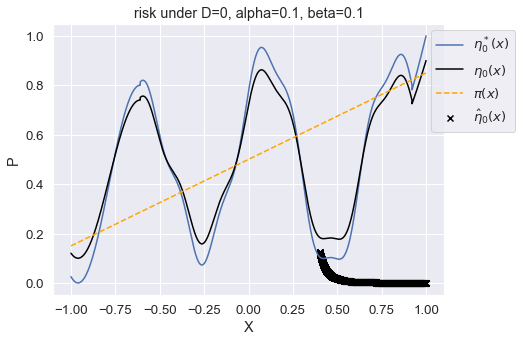

In [2]:
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

do=0
n_epochs=40

expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    alpha_0=.1,
    alpha_1=0,
    beta_0=.3,
    beta_1=0,
    shuffle=False
)

baseline = {
    'model': 'COM-SL',
    'target': 'Y0'
}

loss_config = {
    'alpha': .1,
    'beta': .3,
    'prop_func': pi,
    'pi_pdf': PI_PDF,
    'do': do,
    'pd': expdf['D'].mean(),
    'reweight': False
}

results = run_baseline(expdf, baseline, do,
             loss_config=loss_config, n_epochs=n_epochs, train_ratio=.7)

expdf, _ = generate_syn_data(
    NS=5000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    shuffle=False
)
debug_info = {
    'val_x': results['x'].squeeze(),
    'val_py': results['py_hat'].squeeze()
}

sns.set(font_scale=1.2)
viz_ccpe_estimates(expdf, debug_info, error_params[f'alpha_{do}'][0],
                   error_params[f'beta_{do}'][0], do, Y0_PDF, Y1_PDF, PI_PDF)



## Experiment: comparison among baselines

In [2]:
do=0
baselines = [{
    'model': 'OBS',
    'target': 'Y0'
},{
    'model': 'COM',
    'target': 'Y0'
},{
    'model': 'COM-SL',
    'target': 'Y0'
},{
    'model': 'RW',
    'target': 'Y0'
},{
    'model': 'RW-SL',
    'target': 'Y0'
},{
    'model': 'Proxy Oracle',
    'target': f'Y0_{do}'
},{
    'model': 'Target Oracle',
    'target': f'YS_{do}'
}]

param_configs = []
for alpha in [0, .1, .2, .3, .4]:
    for beta in [0, .1, .2, .3, .4]:
        param_configs.append({
            'alpha': alpha,
            'beta': beta
        })

In [19]:
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'

N_RUNS=1
NS=10000
n_epochs=20

exp_results = run_baseline_comparison_exp_grid(
    baselines,
    param_configs,
    do=do,
    N_RUNS=N_RUNS,
    NS=NS,
    pi_pdf='linear',
    K=1,
    n_epochs=n_epochs
)


RUN: 0, model: OBS, alpha: 0, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


RUN: 0, model: COM, alpha: 0, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]


RUN: 0, model: COM-SL, alpha: 0, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.31it/s]


RUN: 0, model: RW, alpha: 0, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


RUN: 0, model: RW-SL, alpha: 0, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: Proxy Oracle, alpha: 0, beta: 0



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: Target Oracle, alpha: 0, beta: 0



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: OBS, alpha: 0, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: COM, alpha: 0, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]


RUN: 0, model: COM-SL, alpha: 0, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: RW, alpha: 0, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.47it/s]


RUN: 0, model: RW-SL, alpha: 0, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]


RUN: 0, model: Proxy Oracle, alpha: 0, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: Target Oracle, alpha: 0, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


RUN: 0, model: OBS, alpha: 0, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]


RUN: 0, model: COM, alpha: 0, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: COM-SL, alpha: 0, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.22it/s]


RUN: 0, model: RW, alpha: 0, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: RW-SL, alpha: 0, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


RUN: 0, model: Proxy Oracle, alpha: 0, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: Target Oracle, alpha: 0, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: OBS, alpha: 0, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.19it/s]


RUN: 0, model: COM, alpha: 0, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]


RUN: 0, model: COM-SL, alpha: 0, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]


RUN: 0, model: RW, alpha: 0, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]


RUN: 0, model: RW-SL, alpha: 0, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


RUN: 0, model: Proxy Oracle, alpha: 0, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]


RUN: 0, model: Target Oracle, alpha: 0, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]


RUN: 0, model: OBS, alpha: 0, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: COM, alpha: 0, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]


RUN: 0, model: COM-SL, alpha: 0, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: RW, alpha: 0, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: RW-SL, alpha: 0, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]


RUN: 0, model: Proxy Oracle, alpha: 0, beta: 0.4



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: Target Oracle, alpha: 0, beta: 0.4



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.43it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.19it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.4



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.4



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]


RUN: 0, model: COM, alpha: 0.2, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: COM, alpha: 0.2, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]


RUN: 0, model: COM, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.19it/s]


RUN: 0, model: COM, alpha: 0.2, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


RUN: 0, model: COM, alpha: 0.2, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0.4



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0.4



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]


RUN: 0, model: OBS, alpha: 0.3, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]


RUN: 0, model: COM, alpha: 0.3, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: RW, alpha: 0.3, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: OBS, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.20it/s]


RUN: 0, model: COM, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]


RUN: 0, model: RW, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


RUN: 0, model: OBS, alpha: 0.3, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


RUN: 0, model: COM, alpha: 0.3, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: RW, alpha: 0.3, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.31it/s]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: OBS, alpha: 0.3, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: COM, alpha: 0.3, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.31it/s]


RUN: 0, model: RW, alpha: 0.3, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.12s/it]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: OBS, alpha: 0.3, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: COM, alpha: 0.3, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]


RUN: 0, model: RW, alpha: 0.3, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0.4



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0.4



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: OBS, alpha: 0.4, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:12<00:00,  1.54it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]


RUN: 0, model: OBS, alpha: 0.4, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.22it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]


RUN: 0, model: OBS, alpha: 0.4, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.22it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


RUN: 0, model: OBS, alpha: 0.4, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


RUN: 0, model: OBS, alpha: 0.4, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.18it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.4



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.4



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.4



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


In [ ]:
def eta(x, environment):
    if environment=='sinusoid':
        return .5 + .5 * np.sin(2.9*x + .1)

    elif environment=='piecewise_sinusoid':
        return np.piecewise(x,[
            ((-1 <= x) & (x <= -.61)),
            ((-.61 < x) & (x <= 0.921)),
            ((0.921 < x) & (x <= 1))],  
            [lambda v: .4+.4*np.cos(9*v+5.5), 
            lambda v: .5+.3*np.sin(8*v+.9)+.15*np.sin(10*v+.2)+.05*np.sin(30*v+.2),
            lambda v: np.power(v, 3)])

    elif environment=='low_base_rate_sinusoid':
        return .5-.5 * np.sin(2.9*x+.1)

    else: 
        return np.piecewise(x,[
            ((-1 <= x) & (x <= -.5)),
            ((-.5 < x) & (x <= 0.2069)),
            ((0.2069 < x) & (x <= 0.8)),
            ((0.8 < x) & (x <= 1))],  
            [lambda v: -1.5*v-.75, 
             lambda v: 1.4*v+.7,
             lambda v: -1.5*v+1.3,
             lambda v: 1.25*v - .9 ])
    
    
    

In [44]:
v = pd.DataFrame(exp_results)



v[(v['alpha'] == 0.3) & (v['beta'] == 0.1)]


,model,AU-ROC,ACC,alpha,beta
112,OBS,0.500000,0.496667,0.3,0.1
113,COM,0.764978,0.709667,0.3,0.1
114,COM-SL,0.656991,0.496667,0.3,0.1
115,RW,0.848135,0.770000,0.3,0.1
116,RW-SL,0.806691,0.496667,0.3,0.1
117,Proxy Oracle,0.768344,0.711000,0.3,0.1
118,Target Oracle,0.849632,0.783333,0.3,0.1


In [21]:
print(resultdf.groupby('model').mean())

sns.set(font_scale=1.2)
g=sns.barplot(data=resultdf[resultdf['alpha'] == .3], x='model', y='ACC', capsize=.2)
plt.xticks(rotation=45)
plt.ylabel('AU-ROC')
plt.xlabel('')

sns.set(font_scale=1.2)
g=sns.barplot(data=resdf, x='model', y='ACC', capsize=.2)
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('')

NameError: name 'resultdf' is not defined

## Experiment: comparison among baselines

In [40]:
r1df = pd.read_csv('results/2-2-main_exp_results.csv')
r2df = pd.read_csv('results/exp1_grid_results_NR=10_NS=10000_E=40.csv')


resdf = pd.concat([r1df, r2df])
means = resdf.groupby(['alpha', 'beta', 'model']).mean()['ACC']
print(means.to_latex())

stds = resdf.groupby(['alpha', 'beta', 'model']).std()['ACC']
print(stds.to_latex())


\begin{tabular}{lllr}
\toprule
    &     &                  &       ACC \\
alpha & beta & model &           \\
\midrule
0.0 & 0.0 & Conditional outcome &  0.756200 \\
    &     & Conditional outcome (SL) &  0.771900 \\
    &     & Observational &  0.556967 \\
    &     & Proxy PO Oracle &  0.755400 \\
    &     & Target PO Oracle &  0.726600 \\
0.1 & 0.3 & Conditional outcome &  0.630800 \\
    &     & Conditional outcome (SL) &  0.762400 \\
    &     & Observational &  0.545800 \\
    &     & Proxy PO Oracle &  0.658467 \\
    &     & Target PO Oracle &  0.757900 \\
0.2 & 0.2 & Conditional outcome &  0.721467 \\
    &     & Conditional outcome (SL) &  0.693050 \\
    &     & Observational &  0.537733 \\
    &     & Proxy PO Oracle &  0.754067 \\
    &     & Target PO Oracle &  0.707783 \\
0.3 & 0.1 & Conditional outcome &  0.679267 \\
    &     & Conditional outcome (SL) &  0.730867 \\
    &     & Observational &  0.585333 \\
    &     & Proxy PO Oracle &  0.646400 \\
    &     & Targ

/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_2952/2909102595.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(means.to_latex())
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_2952/2909102595.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stds.to_latex())


## Main Experiment: parameter estimation via CCPE

In [ ]:
SAMPLE_SIZES = [1000, 2000, 3000, 4000, 5000, 10000, 20000]
exp_results, py_results = ccpe_benchmark_exp(SAMPLE_SIZES, N_RUNS=150, K=1, n_epochs=30)
result_df = get_ccpe_result_df(do=1, exp_results=exp_results)

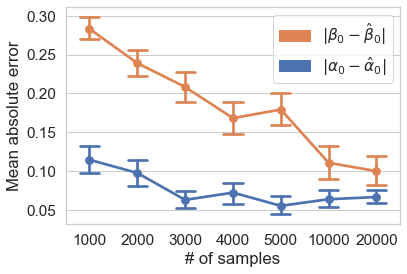

In [57]:
result_df = pd.read_csv('results/R7_K=1_N_RUNS=150_n_epochs=30_d0.csv')
result_df = result_df[result_df['aggregate'] == False]

sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.4)

g = sns.pointplot(
    data=result_df,
    x='NS',
    y='error',
    hue='parameter',
    capsize=.4,
    legend=True,
    errorbar="se"
)
g.set(xlabel='# of samples', ylabel='Mean absolute error')
black_patch = mpatches.Patch(color=sns.color_palette()[1], label=r'$|\beta_0 - \hat{\beta}_0|$')
red_patch = mpatches.Patch(color=sns.color_palette()[0], label=r'$|\alpha_0 - \hat{\alpha}_0|$')

plt.legend(handles=[black_patch, red_patch])

plt.savefig('figs/estimation_error.png', dpi=500, bbox_inches='tight')


## Experiment: Robustness to parameter estimation Error

In [5]:
params = np.array([0, .2, .4])
errors = np.array([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
configs = []

for param in params: 
    for error in errors:
        estimate = round(param+error, 2)
        if estimate>=0 and estimate<=.5:
            configs.append({
                'param': param,
                'estimate': estimate
            })

exp_results = run_estimation_error_exp(do=0, param_configs=configs, error_param='alpha',
                                       NS=5000, N_RUNS=1, n_epochs=5, train_ratio=.7)

surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.39it/s]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.07s/it]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.30it/s]


surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.05s/it]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.06it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.40it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.42it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.27it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.33it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.45, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.5, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.48it/s]


## Experiment 3 - Robustness plots 

In [2]:
alpha_robustness_results = pd.read_csv('results/alpha_stress_tests.csv')
beta_robustness_results = pd.read_csv('results/beta_stress_tests.csv')
# beta_robustness_results['parameter'] = 'beta'
alpha_robustness_results['bias'] = (alpha_robustness_results['alpha_hat'] - alpha_robustness_results['alpha']).round(decimals=2)
beta_robustness_results['bias'] = (beta_robustness_results['beta_hat'] - beta_robustness_results['beta']).round(decimals=2)
robustness_results = pd.concat([alpha_robustness_results, beta_robustness_results])

alpha_robustness_results = alpha_robustness_results[alpha_robustness_results['alpha'] > 0]
beta_robustness_results = beta_robustness_results[beta_robustness_results['beta'] > 0]



<Figure size 720x360 with 0 Axes>

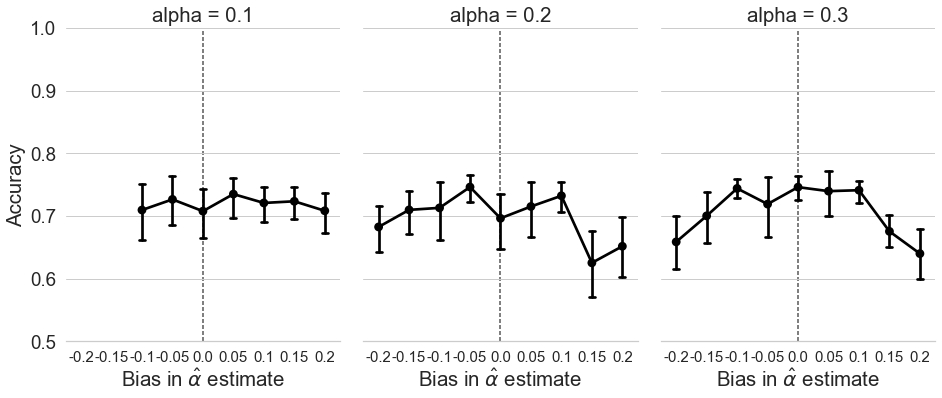

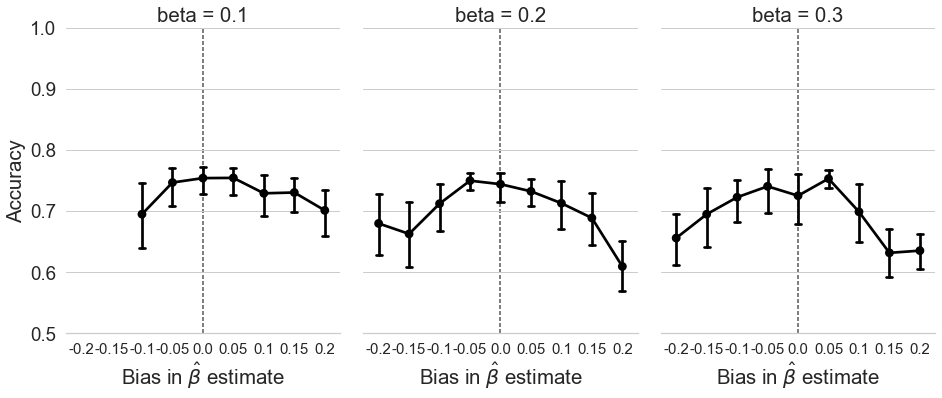

In [35]:
import matplotlib.ticker as tkr
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.7)

# Draw a pointplot to show pulse as a function of three categorical factors
plt.figure(figsize=(10,5))
g = sns.catplot(
    data=alpha_robustness_results, x="bias", y="ACC",  col="alpha",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\alpha}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)


plt.savefig('alpha_errors.png', dpi=400)


    
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=beta_robustness_results, x="bias", y="ACC",  col="beta",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\beta}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)

    
plt.savefig('beta_errors.png', dpi=400)


## Debugging baselines

In [ ]:
compare
alpha:0, beta:0 [looks good]
alpha:.1, beta.3 [looks good]
alpha:.2, beta:.2
alpha:.3, beta.1 [looks good]


In [7]:
## Main Experiment: troubleshoot baselines
    
    
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    alpha_min=0.1,
    alpha_max=0.11,
    beta_min=0.3,
    beta_max=0.31,
    shuffle=True
)

baseline1 = {
    'model': 'Conditional outcome',
    'target': 'Y0'
}

baseline2 = {
    'model': 'Conditional outcome (SL)',
    'target': 'Y0'
}

params1 = {
    'alpha': None,
    'beta': None
}

params2 = {
    'alpha': error_params[f'alpha_{do}'][0],
    'beta': error_params[f'beta_{do}'][0]
}

co = run_baseline(expdf, baseline1, do, params1, n_epochs=20, train_ratio=.7)
cosl = run_baseline(expdf, baseline2, do, params2, n_epochs=20, train_ratio=.7)



surroate params {'alpha': None, 'beta': None}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


surroate params {'alpha': 0.10648197887660037, 'beta': 0.30984503179487555}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


In [8]:
agreement = [(co['py_hat'] > .5) == (cosl['py_hat'] > .5)][0].mean()
print(f'aggreement (%): {agreement.mean():.2f}')
print(f"ACC - S0={co['ACC']:.2f}, SO+SL={cosl['ACC']:.2f}")
print(f"AU-ROC - S0={co['AU-ROC']:.2f}, SO+SL={cosl['AU-ROC']:.2f}")

aggreement (%): 0.65
ACC - S0=0.59, SO+SL=0.77
AU-ROC - S0=0.81, SO+SL=0.83


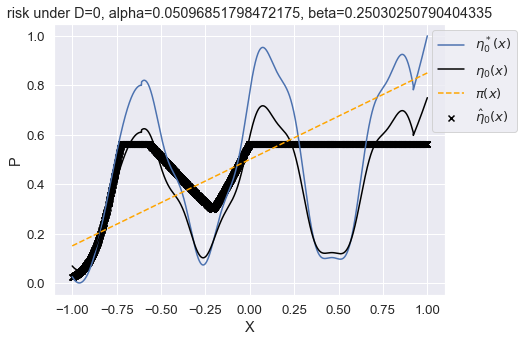

In [10]:
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, _ = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
)
debug_info = {
    'val_x': cosl['x'].squeeze(),
    'val_py': cosl['py_hat'].squeeze()
}
# debug_info = {
#     'val_x': x,
#     'val_py': py_hat
# }
sns.set(font_scale=1.2)
viz_ccpe_estimates(expdf, debug_info, error_params[f'alpha_{do}'][0],
                   error_params[f'beta_{do}'][0], do, Y0_PDF, Y1_PDF, PI_PDF)

In [28]:
expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.2,
    error_max=0.2, 
    shuffle=True
)

split_ix = int(expdf.shape[0]*.7)
train_df, val_df = expdf.iloc[:split_ix,:], expdf.iloc[split_ix:,:]


# Train model
train_loader, val_loader = get_loaders(train_df, val_df, do=0, target='Y0', conditional=True)
model = MLP()

surrogate_params = {
    'alpha': 0.2,
    'beta': 0.2
}

# surrogate_params = {
#     'alpha': None,
#     'beta': None
# }

losses = train(model, target='Y0', train_loader=train_loader, error_params=surrogate_params, n_epochs=40)

# Evaluate on validation data
x, y, py_hat = evaluate(model, val_loader)
y_hat = np.zeros_like(y)
y_hat[py_hat > .5] = 1

TypeError: generate_syn_data() got an unexpected keyword argument 'error_min'